In [2]:
#conda install -c conda-forge scikit-allel
import pandas as pd
import allel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#deletions for this project are across seven inbred mouse strains; underscore used in place of /
strain=['A_J','AKR_J','BALB_CJ','CBA_J','C3H_HeJ','DBA_2J','LP_J']

In [4]:
df_current = pd.DataFrame(columns=['strain','length'])
df = pd.DataFrame(columns=['strain','length'])


for s in strain:
    file='../gold_standard/mouse_vcf/'+s+'_reference.vcf'
    callset = allel.read_vcf(file,fields='*')
    
    df_current = pd.DataFrame({'strain': s, 'length': callset['variants/SVLEN']})
    df = pd.concat([df_current, df],ignore_index=True)

In [5]:
df['length']=pd.to_numeric(df['length'])

In [6]:
df.to_csv('../analysis_files/true_length_7_strains.csv',index=False)

# Figure 1a

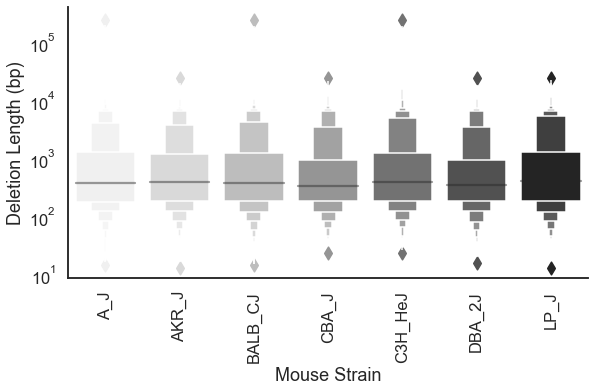

In [7]:
#average deletion length by mouse strain
fig1a=sns.set_style('white')
fig1a=sns.set_context('talk')
fig1a = sns.catplot(x='strain', y='length',kind='boxen',data=df, aspect=1.8,palette='Greys', order=['A_J', 'AKR_J', 'BALB_CJ', 'CBA_J', 'C3H_HeJ', 'DBA_2J', 'LP_J'])
fig1a.set(yscale='log');
fig1a.set(xlabel='Mouse Strain', ylabel='Deletion Length (bp)')
fig1a=sns.despine()
plt.xticks(rotation=90)
plt.savefig("../figures/fig1/fig1a", bbox_inches='tight')

In [8]:
count_row = df.shape[0]
print ("Number of SVs for 7 strains:",count_row)

Number of SVs for 7 strains: 3799


In [9]:
print ("Max deletion length")
df.max()

Max deletion length


strain      LP_J
length    239572
dtype: object

In [10]:
print (df.mean(),df.std())

length    1633.024217
dtype: float64 length    7285.812215
dtype: float64


In [11]:
deletions_per_strain=df.groupby(['strain']).count()
deletions_per_strain=deletions_per_strain.rename(columns={'length': 'n', 'B': 'c'})
deletions_per_strain.head()
deletions_per_strain.to_csv('../analysis_files/SV_deletions_per_strain.csv')
print(deletions_per_strain.mean(),deletions_per_strain.std())

n    542.714286
dtype: float64 n    43.675753
dtype: float64


In [12]:
df_50_100=df.loc[(df['length'] > 50) & (df['length'] <= 100)]
df_100_500=df.loc[(df['length'] > 100) & (df['length'] <= 500)]
df_500_1000=df.loc[(df['length'] > 500) & (df['length'] <=1000)]
df_1000=df.loc[(df['length'] >1000)]

In [13]:
count_row_50_100 = df_50_100.shape[0]
count_row_100_500 = df_100_500.shape[0]
count_row_500_1000 = df_500_1000.shape[0]
count_row_1000 = df_1000.shape[0]

f=open('../analysis_files/true_number_SVs_by_category.csv','w')
f.write('cat,n')
f.write('\n')
f.write('50-100,'+str(count_row_50_100))
f.write('\n')
f.write('100-500,'+str(count_row_100_500))
f.write('\n')
f.write('500-1000,'+str(count_row_500_1000))
f.write('\n')
f.write('>1000,'+str(count_row_1000))
f.write('\n')
f.close()

In [14]:
df_cat=pd.read_csv('../analysis_files/true_number_SVs_by_category.csv')
df_cat['precision']=(df_cat['n']/3710)*100
df_cat.head()
%store df_cat

Stored 'df_cat' (DataFrame)


In [15]:
strain=['A_J','AKR_J','BALB_CJ','CBA_J','C3H_HeJ','DBA_2J','LP_J']

#total tools=15
tools=['BioGraph*',
'breakdancer',
'clever',
'delly',
'gasv',
'gridss',
'indelminer',
'lumpexpress',
'mistrvar',
'pindel',
'platypus',
'popdel',
'rdxplorer',
'smoove',
'sniffles']

In [16]:
#tool detection of deletions
df_current = pd.DataFrame(columns=['strain','length'])
df = pd.DataFrame(columns=['tool','strain','length'])

#0t.sniffles.LP_J_chr19.100p_sorted.modified.vcf
for s in strain:
    for t in tools:
        file='../raw_data/mouse/custom_vcf_fulldata/0t/deletions/nf_0t.'+t+'.'+s+'.chr19.100p_sorted.modified.vcf'
        
        callset = allel.read_vcf(file,fields='*')
        # print(type(callset))
        
        if callset:
            df_current = pd.DataFrame({'tool': t, 'strain': s, 'length': callset['variants/SVLEN']})
            #print(df_current)
        
            df = pd.concat([df_current, df],ignore_index=True)
        else:
            print("Empty File: " + file)
            
#missing files: pindel.BALB_CJ and platypus.BALB_CJ
#from Varuni's files under custom_vcf_fulldata (not new)

/Users/angelalu/opt/anaconda3/lib/python3.7/site-packages/allel/io/vcf_read.py:1745: UserWarning: multiple INFO headers for 'SVLEN'
  warnings.warn('multiple INFO headers for %r' % k)


Empty File: ../raw_data/mouse/custom_vcf_fulldata/0t/deletions/nf_0t.pindel.BALB_CJ.chr19.100p_sorted.modified.vcf
Empty File: ../raw_data/mouse/custom_vcf_fulldata/0t/deletions/nf_0t.platypus.BALB_CJ.chr19.100p_sorted.modified.vcf


In [17]:
#true/gold standard detection of deletions
df_current = pd.DataFrame(columns=['strain','length'])


for s in strain:
    file='../gold_standard/mouse_vcf/'+s+'_reference.vcf'
    callset = allel.read_vcf(file,fields='*')
    
    df_current = pd.DataFrame({'tool': 'true deletions', 'strain': s, 'length': callset['variants/SVLEN']})
    df = pd.concat([df_current, df],ignore_index=True)

print(df)

                  tool strain length
0       true deletions   LP_J    730
1       true deletions   LP_J   2613
2       true deletions   LP_J   1341
3       true deletions   LP_J    226
4       true deletions   LP_J    725
...                ...    ...    ...
902732       BioGraph*    A_J     69
902733       BioGraph*    A_J     69
902734       BioGraph*    A_J   6468
902735       BioGraph*    A_J    252
902736       BioGraph*    A_J    121

[902737 rows x 3 columns]


In [18]:
df['length']=pd.to_numeric(df['length'])
df = df[df['length']>=50]


# Figure 1b

In [19]:
df_number=df.groupby('tool', as_index=False).count()
del df_number['strain']
df_number=df_number.rename(columns={'length': 'n'})
def convert(df_number): 
    return tuple(df_number) 

df_number

,tool,n
0,BioGraph*,3175
1,breakdancer,3542
2,clever,12773
3,delly,3910
4,gasv,82225
5,gridss,4084
6,indelminer,899
7,lumpexpress,3115
8,mistrvar,1943
9,pindel,57046


In [20]:
x = np.arange(16)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

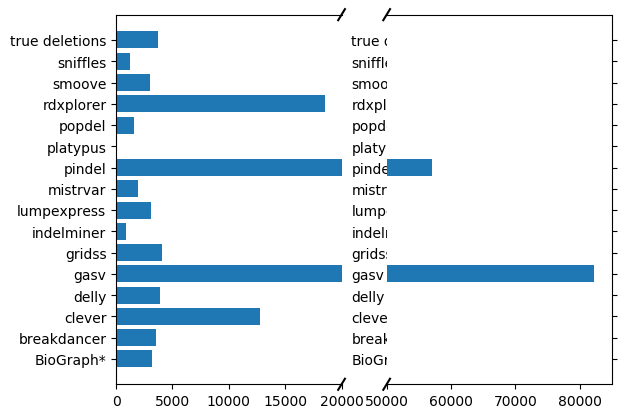

In [28]:
#number of deletions detected by each tool
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

fig1b, (ax, ax2)= plt.subplots(1,2,sharey=True)

ax.barh(width=df_number['n'], y=x)
ax2.barh(width=df_number['n'], y=x)

#ax.bar(df_number['n'], x)
#ax2.bar(df_number['n'], x)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright='off')
ax2.yaxis.tick_right()

ax.set_xlim(0,20000)
ax2.set_xlim(50000,85000) 

plt.yticks(x, df_number['tool'])
ax.tick_params()
#plt.barh(df_number['tool'],df_number['n'])

d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

plt.savefig("../figures/fig1/fig1b", bbox_inches='tight')

[Text(0, 0.5, ''), Text(0.5, 0, '')]

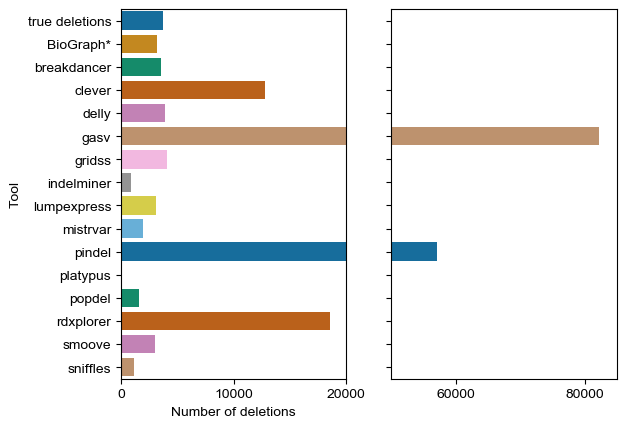

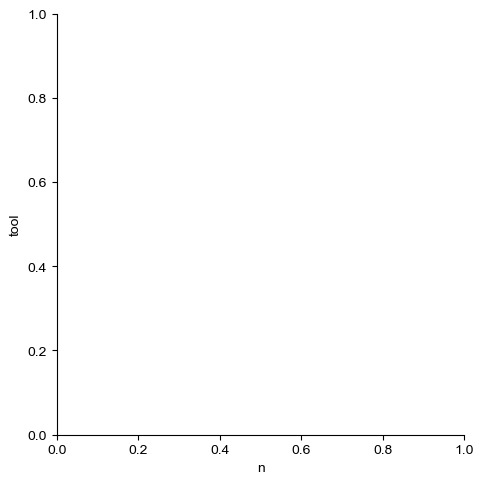

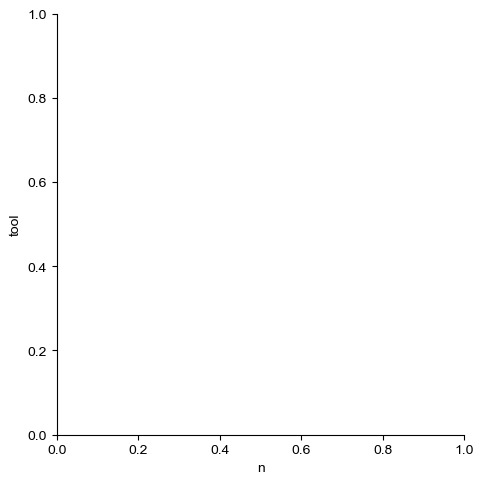

In [26]:
#using seaborn, it generates 2 empty graphs and cannot save properly or center the x-axis title

fig1b, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharey=True)
ax=sns.catplot(x='n',y='tool',data=df_number,kind='bar', ax=ax1, palette='colorblind',order=["true deletions", "BioGraph*","breakdancer", "clever", "delly", "gasv", "gridss", "indelminer", "lumpexpress", "mistrvar", "pindel", "platypus","popdel","rdxplorer", "smoove", "sniffles"])
ax=sns.catplot(x='n',y='tool',data=df_number,kind='bar', ax=ax2, palette='colorblind',order=["true deletions", "BioGraph*","breakdancer", "clever", "delly", "gasv", "gridss", "indelminer", "lumpexpress", "mistrvar", "pindel", "platypus","popdel","rdxplorer", "smoove", "sniffles"])
ax1.set_xlim(0,20000)
ax2.set_xlim(50000,85000)
fig1b=sns.set_style('whitegrid')
fig1b=sns.set_context('talk')
plt.subplots_adjust(wspace=0, hspace=0)
ax1.set(xlabel='Number of deletions', ylabel='Tool')
ax2.set(xlabel='', ylabel='')


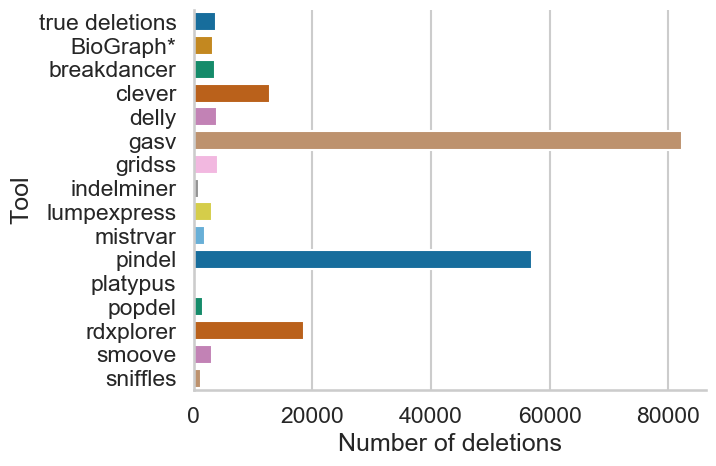

In [27]:
fig1b=sns.set_style('whitegrid')
fig1b=sns.set_context('talk')
fig1b = sns.catplot(x='n', y='tool',data=df_number,kind='bar',aspect=1.5, palette='colorblind', order=["true deletions", "BioGraph*","breakdancer", "clever", "delly", "gasv", "gridss", "indelminer", "lumpexpress", "mistrvar", "pindel", "platypus","popdel","rdxplorer", "smoove", "sniffles"])
fig1b.set(xlabel='Number of deletions', ylabel='Tool')
#fig1b.set(xscale="log");
fig1b=sns.despine()

plt.savefig("../figures/fig1/fig1b_no_break", bbox_inches='tight')

# Figure 1c

In [ ]:
%store -r
fig1c=sns.set_style("white")
fig1c=sns.set_context("talk")
fig1c = sns.catplot(x="threshold", y="nTP", kind="bar",data = df_sum,hue="tool",aspect=1.8, palette="colorblind")
fig1c.set(xlabel='Threshold (bp)', ylabel='Total number of TP calls')
fig1c=sns.despine()
#plt.show(fig1c)
plt.savefig("../figures/fig1/fig1c", bbox_inches='tight')


# Figure 1d

In [ ]:
fig1d=sns.set_style("white")
fig1d=sns.set_context("talk")
fig1d = sns.catplot(x="threshold", y="nTN", kind="bar",data = df_sum,hue="tool",aspect=1.8, palette="colorblind")
fig1d.set(xlabel='Threshold (bp)', ylabel='Total number of TN calls')
fig1d=sns.despine()
#plt.show(fig1d)
plt.savefig("../figures/fig1/fig1d", bbox_inches='tight')

# Figure 1e

In [ ]:
for th in [100]:
    fig1e=sns.set_style("white")
    fig1e=sns.set_context("talk")
    fig1e=sns.lmplot(data=df_sum.loc[(df_sum['threshold'] ==th)], x='nFP', y='nTP', hue='tool',fit_reg=False,aspect=1.5,scatter_kws={"s": 200}, palette='colorblind')
    fig1e.set(xlabel='FP', ylabel='TP')
    plt.title(str(th)+"bp")
    #fig1e.set(xscale="log");
    fig1e=sns.despine()
plt.savefig("../figures/fig1/fig1e", bbox_inches='tight')

# Figure 1f

In [ ]:
for th in [100]:
    fig1f=sns.set_style("white")
    fig1f=sns.set_context("talk")
    fig1f=sns.lmplot(data=df_sum.loc[(df_sum['threshold'] ==th)], x='nFP', y='nTN', hue='tool',fit_reg=False,aspect=1.5,scatter_kws={"s": 200}, palette='colorblind')
    fig1f.set(xlabel='FP', ylabel='TN')
    plt.title(str(th)+"bp")
    #fig1f.set(xscale="log");
    fig1f=sns.despine()
plt.savefig("../figures/fig1/fig1f", bbox_inches='tight')

# Figure 1g

In [ ]:

fig1g=sns.set_style("ticks")
fig1g=sns.set_context("poster")
fig1g = sns.catplot(x="tool", y="length",kind='boxen',data=df, aspect=12, palette="colorblind", order=["true deletions","BioGraph*","breakdancer","clever","delly","gasv","gridss","indelminer","lumpexpress","mistrvar","pindel","platypus","popdel","rdxplorer","smoove","sniffles"])
fig1g.set(yscale="log");
fig1g.set(xlabel='SV-caller', ylabel='Deletion length')
fig1g=sns.despine()
plt.savefig("../figures/fig1/fig1g", bbox_inches='tight')